In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test_) = imdb.load_data(path="imdb.npz",
                                                     num_words=None,
                                                     skip_top=0,
                                                     maxlen=None,
                                                     seed=113,
                                                     start_char=1,
                                                     oov_char=2,
                                                     index_from=3);
print("X-train :",x_train.shape);
print("Y-train :",y_train.shape);
print("X-test :",x_test.shape);
print("Y-test :",y_test.shape);

X-train : (25000,)
Y-train : (25000,)
X-test : (25000,)
Y-test : (25000, 2)


In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

print(y_train[0])

[0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [52]:
print(y_test[0])
print(y_test[1])
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_, num_classes)
print(y_train.shape)
print(y_test[0])
print(y_test[1])

[1. 0.]
[0. 1.]
(25000, 2)
[1. 0.]
[0. 1.]


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=Sequential([
    Dense(100,activation="relu",input_dim=1000),
    Dropout(0.2),
    Dense(70,activation="relu"),
    Dropout(0.2),
    Dense(10,activation="relu"),
    Dense(2,activation="softmax")
]);

model.compile(optimizer="adam",loss="categorical_crossentropy");

In [54]:
print(x_train.shape)
print(y_train.shape)

Early_callback=EarlyStopping(patience=30,monitor="val_loss",mode="min",verbose=1);
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),batch_size=50,callbacks=[Early_callback]);

(25000, 1000)
(25000, 2)
Epoch 1/600
500/500 [==============================] - 5s 7ms/step - loss: 0.4134 - val_loss: 0.3351
Epoch 2/600
500/500 [==============================] - 3s 7ms/step - loss: 0.3129 - val_loss: 0.3222
Epoch 3/600
500/500 [==============================] - 3s 7ms/step - loss: 0.2792 - val_loss: 0.3454
Epoch 4/600
500/500 [==============================] - 3s 6ms/step - loss: 0.2388 - val_loss: 0.3491
Epoch 5/600
500/500 [==============================] - 3s 6ms/step - loss: 0.1848 - val_loss: 0.4059
Epoch 6/600
500/500 [==============================] - 3s 7ms/step - loss: 0.1392 - val_loss: 0.4355
Epoch 7/600
500/500 [==============================] - 3s 6ms/step - loss: 0.1054 - val_loss: 0.4916
Epoch 8/600
500/500 [==============================] - 3s 7ms/step - loss: 0.0853 - val_loss: 0.5582
Epoch 9/600
500/500 [==============================] - 3s 7ms/step - loss: 0.0659 - val_loss: 0.6401
Epoch 10/600
500/500 [==============================] - 3s 6ms/ste

<AxesSubplot:>

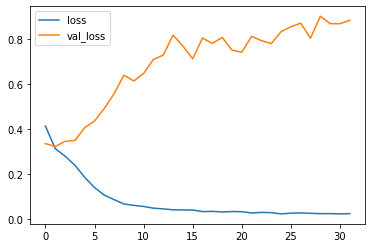

In [55]:
__los__=pd.DataFrame(model.history.history);
__los__.plot()

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
__pred__=model.predict(x_test);
X=pd.DataFrame(__pred__,columns=["0","1"])
__binary_pred__=(X["1"]>X["0"]).astype("int32");
pd.DataFrame(__binary_pred__);


782/782 [==============================] - 2s 3ms/step


In [57]:
__binary_pred__

print(pd.DataFrame(y_test_).value_counts());
print(__binary_pred__.value_counts());


0    12500
1    12500
dtype: int64
1    13130
0    11870
dtype: int64


              precision    recall  f1-score   support

           0       0.86      0.82      0.84     12500
           1       0.82      0.87      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



<AxesSubplot:>

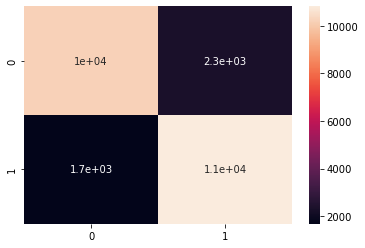

In [58]:
# Classification Report and Confusion Matrix
print(classification_report(y_test_,__binary_pred__))
sns.heatmap(confusion_matrix(y_test_,__binary_pred__),annot=True)